In [4]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)

import numpy as np
import matplotlib.pyplot as plt
from ecc_burst_new import EccBurstNew
from ecc_prior_new import NewPrior
from scipy.special import logsumexp

%load_ext autoreload

%matplotlib inline
%autoreload 2

In [ ]:
def prior_mapping(Mtot, Mc, destar, tstar, fstar, tmin, tmax):
    Nf = 500
    Nt = 300

    Fs = np.linspace(100, 400, Nf)
    Ts = np.linspace(tmin, tmax, Nt)

    prior_map = np.zeros([Nf, Nt])

    for ii,tt in enumerate(Ts):
        for jj,ff in enumerate(Fs):
            prior_map[jj,ii] = prior.get_prior([[tt,ff]], Mtot, Mc, destar, tstar, fstar)
    
    return Ts, Fs, prior_map

In [ ]:
Mtot = 20 #Total mass
#Conversion factors
GMsun = 1.32712440018e20  # m^3/s^2
c = 299792458 # m/s
Tsun = GMsun / c**3
M2sec = Tsun*Mtot
q = 0.9
Mchirp = q**(3/5)/(1+q)**(6/5)*Mtot

#meta-params for large difference in time
tstar = -5
tstarM = tstar/M2sec
fstar = 100
fstarM = fstar*M2sec
destar = 0.2
tminM = -10/M2sec
tmaxM = 0.0/M2sec
tmin, tmax = tminM*M2sec, tmaxM*M2sec

#Create anchor covariance matrix
dt0 = 1/fstar
df0 = fstar/(2*np.pi)
dde0 = destar/10
anchor_cov = [[dt0**2,0,0],[0,df0**2,0], [0,0,dde0**2]]

In [2]:
#Establish burst class
eb = EccBurstNew(q)
prior = NewPrior(tmin, tmax)

NameError: name 'EccBurstNew' is not defined

In [3]:
bursts = eb.get_all_bursts(tstarM, fstarM, destar, tminM, tmaxM)
tf_bursts_SI = np.array([[t*M2sec, f/M2sec, de] for t,f,de in bursts])
np.savetxt("bursts.dat", tf_bursts_SI, comments='#M = 20, q = 0.9, tstar = -5, fstar = 100, tmin = -10, tmax = 0')

NameError: name 'eb' is not defined

In [10]:
tf_bursts_SI

array([[-7.64384885e+00,  9.34212566e+01,  1.06100805e-02],
       [-6.25593939e+00,  9.45012354e+01,  4.84094874e-02],
       [-5.68467093e+00,  9.56884528e+01,  8.61983835e-02],
       [-5.36136762e+00,  9.69926618e+01,  1.24025119e-01],
       [-5.15000000e+00,  9.84253305e+01,  1.61940796e-01],
       [-5.00000000e+00,  1.00000000e+02,  2.00000000e-01],
       [-4.86292551e+00,  1.01574669e+02,  2.47232837e-01],
       [-4.76627567e+00,  1.03319918e+02,  2.96823590e-01],
       [-4.69527433e+00,  1.05260091e+02,  3.49043512e-01],
       [-4.64163519e+00,  1.07424888e+02,  4.04212418e-01],
       [-4.60031996e+00,  1.09850928e+02,  4.62710944e-01],
       [-4.56807390e+00,  1.12583930e+02,  5.24996884e-01],
       [-4.54269268e+00,  1.15681762e+02,  5.91627355e-01],
       [-4.52262556e+00,  1.19218843e+02,  6.63289444e-01],
       [-4.50674686e+00,  1.23292620e+02,  7.40843511e-01],
       [-4.49421747e+00,  1.28033402e+02,  8.25385913e-01],
       [-4.48439738e+00,  1.33619740e+02

In [11]:
icovs = prior.get_all_icovs(tstarM, fstarM, destar, tminM, tmaxM, anchor_cov, Mtot, Mchirp)

In [12]:
icovs

array([[[ 9.99999981e+03, -1.81766330e+04],
        [-1.81766330e+04,  3.30390379e+04]],

       [[ 1.00000000e+04, -8.73750913e+02],
        [-8.73750913e+02,  7.63702654e+01]],

       [[ 1.00000000e+04, -2.94212606e+02],
        [-2.94212606e+02,  8.67278295e+00]],

       [[ 1.00000000e+04, -1.15445855e+02],
        [-1.15445855e+02,  1.34257753e+00]],

       [[ 1.00000000e+04, -3.68671439e+01],
        [-3.68671439e+01,  1.41488224e-01]],

       [[ 1.00000000e+04,  0.00000000e+00],
        [ 0.00000000e+00,  3.94784176e-03]],

       [[ 1.00000000e+04,  1.75428808e+00],
        [ 1.75428808e+00,  1.00956811e-02]],

       [[ 1.00000000e+04, -8.20091372e+00],
        [-8.20091372e+00,  3.61113963e-02]],

       [[ 1.00000000e+04, -2.69093189e+01],
        [-2.69093189e+01,  1.37304798e-01]],

       [[ 1.00000000e+04, -5.24525382e+01],
        [-5.24525382e+01,  3.93656158e-01]],

       [[ 1.00000000e+04, -8.35167460e+01],
        [-8.35167460e+01,  8.90171275e-01]],

       [[ 

In [18]:
#changed anchor burst to a different burst that is forward in time
tstar1 = -4.49421747
tstarM1 = tstar1/M2sec
fstar1 = 128.033402
fstarM1 = fstar1*M2sec
destar1 = 0.825
tminM1 = -10/M2sec
tmaxM1 = 0.0/M2sec
tmin1, tmax1 = tminM1*M2sec, tmaxM1*M2sec

#Create anchor covariance matrix
dt01 = 1/fstar1
df01 = fstar1/(2*np.pi)
dde01 = destar1/10
anchor_cov1 = [[dt01**2,0,0],[0,df01**2,0], [0,0,dde01**2]]

In [19]:
icovs1 = prior.get_all_icovs(tstarM1, fstarM1, destar1, tminM1, tmaxM1, anchor_cov1, Mtot, Mchirp)

In [20]:
icovs1

array([[[ 1.63925520e+04, -4.40777465e+03],
        [-4.40777465e+03,  1.18548105e+03]],

       [[ 1.63925520e+04, -3.69134540e+03],
        [-3.69134540e+03,  8.31497648e+02]],

       [[ 1.63925520e+04, -3.14734259e+03],
        [-3.14734259e+03,  6.04534590e+02]],

       [[ 1.63925520e+04, -2.71767754e+03],
        [-2.71767754e+03,  4.50792466e+02]],

       [[ 1.63925520e+04, -2.36845437e+03],
        [-2.36845437e+03,  3.42424959e+02]],

       [[ 1.63925520e+04, -2.07839520e+03],
        [-2.07839520e+03,  2.63726568e+02]],

       [[ 1.63925520e+04, -1.83338081e+03],
        [-1.83338081e+03,  2.05245589e+02]],

       [[ 1.63925520e+04, -1.62362415e+03],
        [-1.62362415e+03,  1.60997821e+02]],

       [[ 1.63925520e+04, -1.44209764e+03],
        [-1.44209764e+03,  1.27036868e+02]],

       [[ 1.63925520e+04, -1.28360611e+03],
        [-1.28360611e+03,  1.00671799e+02]],

       [[ 1.63925520e+04, -1.14421385e+03],
        [-1.14421385e+03,  8.00159600e+01]],

       [[ 

In [21]:
#changed anchor burst to a burst that is backward in time
tstar2 = -5.68467093
tstarM2 = tstar2/M2sec
fstar2 = 9.56884528e+01
fstarM2 = fstar2*M2sec
destar2 = 0.825
tminM2 = -10/M2sec
tmaxM2 = 0.0/M2sec
tmin2, tmax2 = tminM2*M2sec, tmaxM2*M2sec

#Create anchor covariance matrix
dt02 = 1/fstar2
df02 = fstar2/(2*np.pi)
dde02 = destar2/10
anchor_cov2 = [[dt02**2,0,0],[0,df02**2,0], [0,0,dde02**2]]

In [22]:
icovs2 = prior.get_all_icovs(tstarM2, fstarM2, destar2, tminM2, tmaxM2, anchor_cov2, Mtot, Mchirp)

In [23]:
icovs2

array([[[ 9.15628000e+03, -2.46202170e+03],
        [-2.46202170e+03,  6.62337232e+02]],

       [[ 9.15628000e+03, -2.06185053e+03],
        [-2.06185053e+03,  4.64606366e+02]],

       [[ 9.15628000e+03, -1.75799046e+03],
        [-1.75799046e+03,  3.37824634e+02]],

       [[ 9.15628000e+03, -1.51799528e+03],
        [-1.51799528e+03,  2.51941662e+02]],

       [[ 9.15628000e+03, -1.32293198e+03],
        [-1.32293198e+03,  1.91403521e+02]],

       [[ 9.15628000e+03, -1.16091554e+03],
        [-1.16091554e+03,  1.47437693e+02]],

       [[ 9.15628000e+03, -1.02405946e+03],
        [-1.02405946e+03,  1.14764808e+02]],

       [[ 9.15628000e+03, -9.06897063e+02],
        [-9.06897063e+02,  9.00423112e+01]],

       [[ 9.15628000e+03, -8.05502999e+02],
        [-8.05502999e+02,  7.10658941e+01]],

       [[ 9.15628000e+03, -7.16975425e+02],
        [-7.16975425e+02,  5.63325023e+01]],

       [[ 9.15628000e+03, -6.39116007e+02],
        [-6.39116007e+02,  4.47883215e+01]],

       [[ 

In [16]:
ts, fs, burst_map = prior_mapping(Mtot, Mchirp, destar, tstar, fstar, -4.45568111, -4.40)

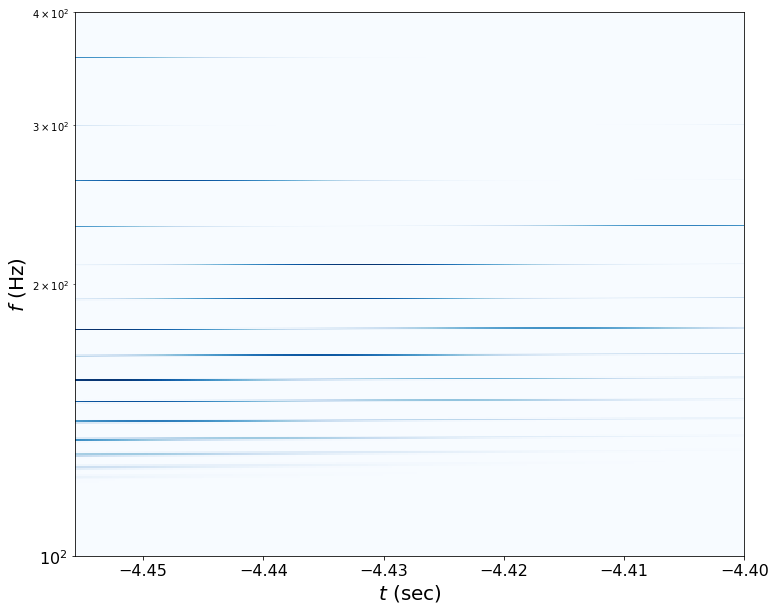

In [17]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.pcolormesh(ts, fs, burst_map, cmap='Blues')
#ax.set_ylim([10, 100]);
ax.set_xlabel('$t$ (sec)', fontsize=20);
ax.set_ylabel('$f$ (Hz)', fontsize=20);
ax.tick_params(labelsize=16)
ax.set_yscale('log')

In [ ]:
burst_map